In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import seaborn as sns

In [3]:
df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv', )

In [4]:
df1.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
df1.columns= df1.columns.str.lower().str.replace(' ','_')

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
df1.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [8]:
df1.describe(include ='object').T

,count,unique,top,freq
customer,9134,9134,BU79786,1
state,9134,5,California,3150
response,9134,2,No,7826
coverage,9134,3,Basic,5568
education,9134,5,Bachelor,2748
effective_to_date,9134,59,1/10/11,195
employmentstatus,9134,5,Employed,5698
gender,9134,2,F,4658
location_code,9134,3,Suburban,5779
marital_status,9134,3,Married,5298


In [9]:
summary = df1.describe().T

In [10]:
summary.apply(lambda x: x['75%'] - x['25%'], axis = 1)

customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_last_claim             17.000000
months_since_policy_inception       47.000000
number_of_open_complaints            0.000000
number_of_policies                   3.000000
total_claim_amount                 275.256594
dtype: float64

In [11]:
summary['IQR'] = summary['75%'] - summary['25%']

In [12]:
summary['LowerLimit'] = summary['25%'] -  1.5*summary['IQR']
summary['UpperLimit'] = summary['75%'] +  1.5*summary['IQR']
summary

,count,mean,std,min,25%,50%,75%,max,IQR,LowerLimit,UpperLimit
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190,4967.915247,-3457.621076,16414.039912
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000,62320.000000,-93480.000000,155800.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000,6.500000,170.500000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000,17.000000,-19.500000,48.500000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000,47.000000,-46.500000,141.500000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000,3.000000,-3.500000,8.500000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678,275.256594,-140.626647,960.399730


<Axes: xlabel='total_claim_amount', ylabel='Count'>

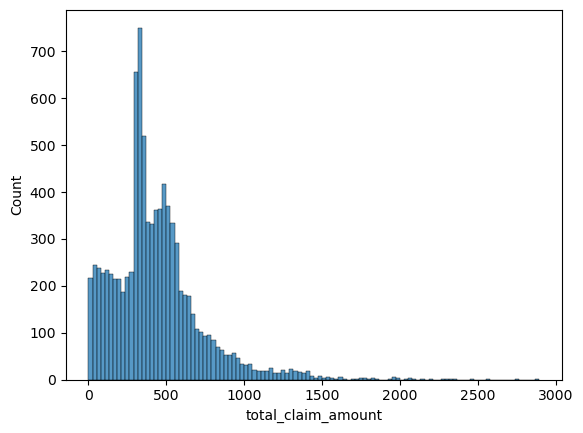

In [18]:
sns.histplot(df1.total_claim_amount)

<Axes: xlabel='months_since_last_claim', ylabel='Count'>

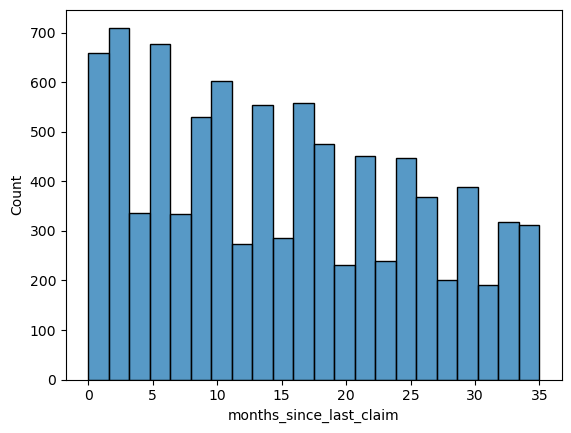

In [19]:
sns.histplot(df1.months_since_last_claim)


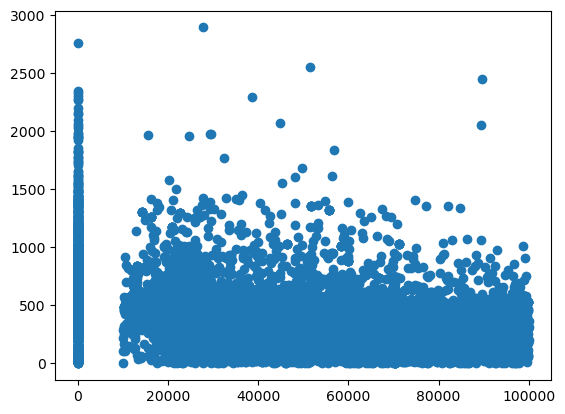

In [21]:
plt.scatter(x = df1.income , y=df1.total_claim_amount)

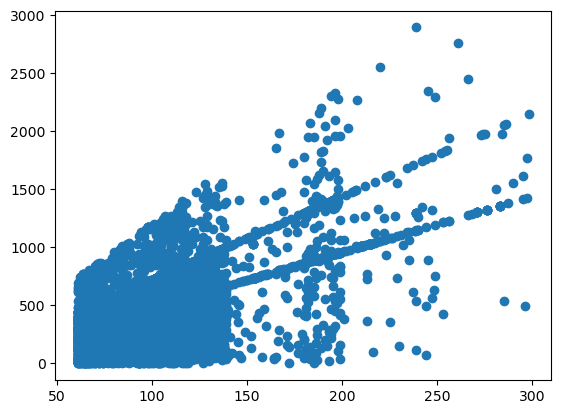

In [26]:
plt.scatter(x = df1.monthly_premium_auto , y=df1.total_claim_amount)

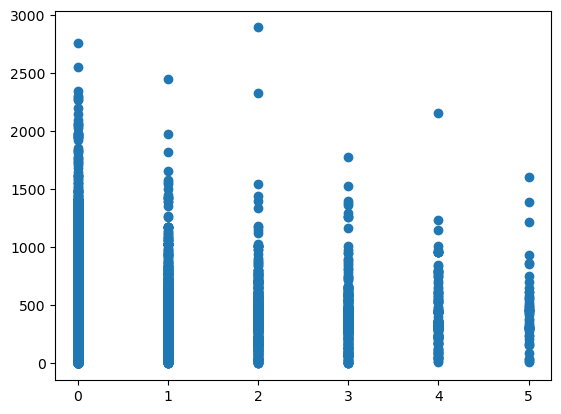

In [22]:
plt.scatter(x = df1.number_of_open_complaints , y=df1.total_claim_amount)

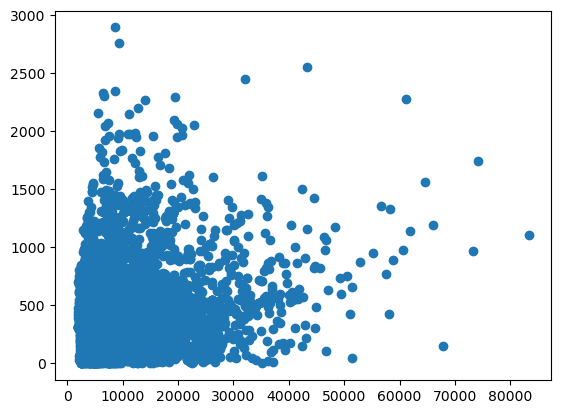

In [25]:
plt.scatter(x = df1.customer_lifetime_value , y=df1.total_claim_amount)

<Axes: >

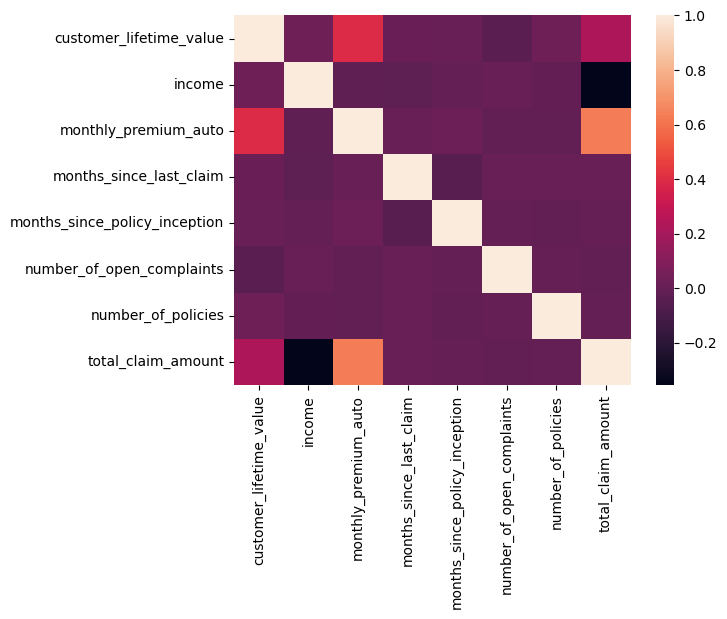

In [23]:
sns.heatmap(df1.select_dtypes(np.number).corr())

<Axes: >

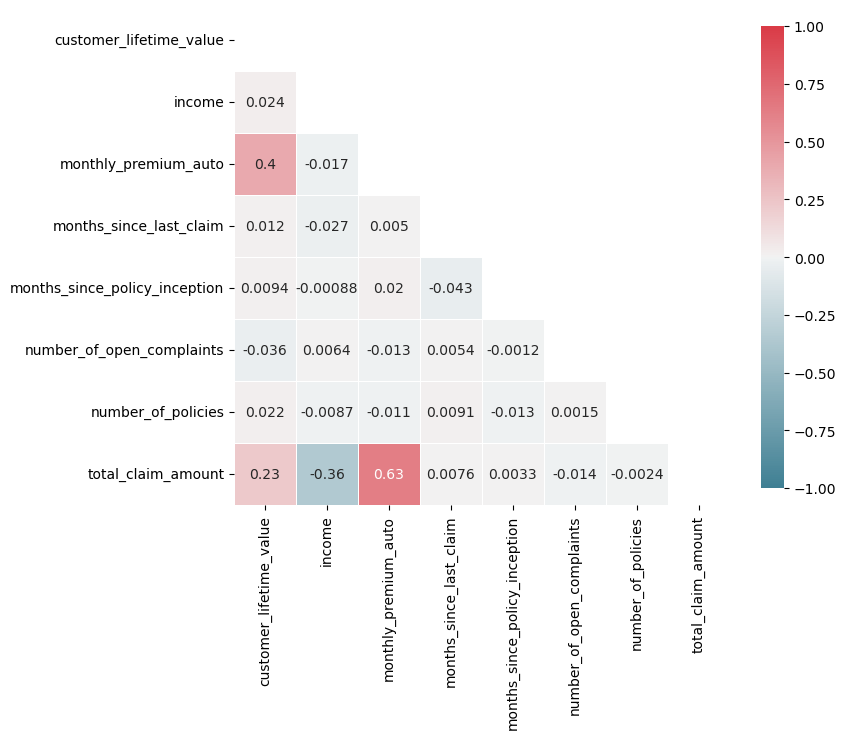

In [24]:
corr = df1.select_dtypes(np.number).corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(2020, 10, as_cmap = True)
plt.figure(figsize = (8, 8))
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, annot = True,
            square = True, linewidths = 0.5, cbar_kws = {'shrink' : 0.75})